In [45]:
"""
This Notebook has been modified and adapted from the original version provided as part of
Helen Sun's "Hands-On PyTorch Machine Learning" course published on LinkedIn Learning.

I prefer to recreate the exercise files myself rather than working directly with them because
it improves my learning comprehension.
"""
import numpy as np
import matplotlib.pyplot as plt
import ssl
import torch
import torchvision

from torch.autograd import Variable
from torch import nn, optim

In [2]:
# Create some tensors
t0 = torch.tensor(100)                      # 0-D tensor
t1 = torch.tensor([1, 2, 3])                # 1-D tensor
t2 = torch.tensor([[1, 2, 3], [7, 5, 3]])   # 2-D tensor

print(t0)
print(t1)
print(t2)

tensor(100)
tensor([1, 2, 3])
tensor([[1, 2, 3],
        [7, 5, 3]])


In [9]:
""" 
Set Datatype and view size and dimensions
Tensor Data Types
    torch.bool
    torch.int8
    torch.uint8
    torch.int16
    torch.int32
    torch.int64
    torch.half
    torch.float
    torch.double
    torch.bfloat
"""

# Set a datatype for the tensor
example = torch.ones((4, 5), dtype=torch.int16)
print(example)

# Print the size (can also use shape like numpy)
print(example.size())

# Print the dimensions
print(example.ndimension())
print(example.ndim)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=torch.int16)
torch.Size([4, 5])
2
2


***
***
#### Basic Operations

In [10]:
# Create 2 tensors
u = torch.tensor([1.0, 2.0])
v = torch.tensor([3.0, 4.0])

print(u)
print(v)

tensor([1., 2.])
tensor([3., 4.])


In [16]:
# Try some common tensor functions
a = torch.rand(2, 4) * 2 - 1

print('Common functions:\n')
print('- abs:\n', torch.abs(a))
print('- ceil:\n', torch.ceil(a))
print('- floor:\n', torch.floor(a))
print('- clamp:\n', torch.clamp(a, -0.5, 0.5))
print('- mean:\n', a.mean())
print('- min:\n', a.min())
print('- max:\n', a.max())


Common functions:

- abs:
 tensor([[0.6698, 0.8233, 0.2141, 0.2698],
        [0.0750, 0.5502, 0.7701, 0.6372]])
- ceil:
 tensor([[1., -0., 1., -0.],
        [-0., -0., 1., -0.]])
- floor:
 tensor([[ 0., -1.,  0., -1.],
        [-1., -1.,  0., -1.]])
- clamp:
 tensor([[ 0.5000, -0.5000,  0.2141, -0.2698],
        [-0.0750, -0.5000,  0.5000, -0.5000]])
- mean:
 tensor(-0.0877)
- min:
 tensor(-0.8233)
- max:
 tensor(0.7701)


In [21]:
# Trigonometric functions and their inverses

print('Trigonometric functions:\n')

x = torch.tensor([0, np.pi / 2, np.pi])
print(x)
print(torch.sin(x))
print(torch.cos(x))

# get an evenly spaced list of numbers between a range
pi = torch.linspace(-np.pi/2, np.pi/2, steps=1000)
print(pi[:5])  # lower bound
print(pi[-5:]) # upper bound

sined = torch.sin(pi)
cosed = torch.cos(pi)
print(sined[0:5])
print(cosed[0:5])

Trigonometric functions:

tensor([0.0000, 1.5708, 3.1416])
tensor([ 0.0000e+00,  1.0000e+00, -8.7423e-08])
tensor([ 1.0000e+00, -4.3711e-08, -1.0000e+00])
tensor([-1.5708, -1.5677, -1.5645, -1.5614, -1.5582])
tensor([1.5582, 1.5614, 1.5645, 1.5677, 1.5708])
tensor([-1.0000, -1.0000, -1.0000, -1.0000, -0.9999])
tensor([-4.3711e-08,  3.1447e-03,  6.2894e-03,  9.4340e-03,  1.2579e-02])


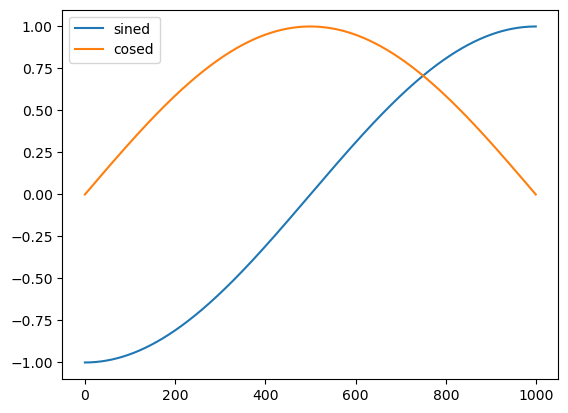

In [22]:
# Visualize using Matplotlib
plt.plot(sined, label="sined")
plt.plot(cosed, label="cosed")
plt.legend()
plt.show()

***
***
#### PyTorch-Numpy Bridge

In [23]:
numpy_array = np.ones((2,3))
print(numpy_array)

pytorch_tensor = torch.from_numpy(numpy_array)
print(pytorch_tensor)

[[1. 1. 1.]
 [1. 1. 1.]]
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [24]:
pytorch_rand = torch.rand(2, 3)
print(pytorch_rand)

numpy_rand = pytorch_rand.numpy()
print(numpy_rand)

tensor([[0.0456, 0.9983, 0.1377],
        [0.5917, 0.0244, 0.5909]])
[[0.04561031 0.9982668  0.13766444]
 [0.5917119  0.02438641 0.5908968 ]]


In [27]:
# Converted objects are using the same underlying memory as their source objects meaning
# changes to one will be reflected in the other.
numpy_array[1, 1] = 23
print(pytorch_tensor)

pytorch_rand[1, 1] = 17
print(numpy_rand)

tensor([[ 1.,  1.,  1.],
        [ 1., 23.,  1.]], dtype=torch.float64)
[[ 0.04561031  0.9982668   0.13766444]
 [ 0.5917119  17.          0.5908968 ]]


***
***
#### Autograd

In [30]:
x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [31]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [33]:
z = y * y * 3
out = z.mean()
print(z, "\n", out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) 
 tensor(27., grad_fn=<MeanBackward0>)


In [ ]:
# Perform backpropagation
out.backward()

In [38]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [39]:
# Another Autograd example
x = torch.randn(3)
x = Variable(x, requires_grad=True)
print(x)

tensor([ 0.1908, -1.6765,  0.8555], requires_grad=True)


In [40]:
# Create a new variable y that will have a gradient function attached to it
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
print(y)

tensor([  195.3675, -1716.7858,   876.0624], grad_fn=<MulBackward0>)


In [41]:
# Define custom gradients for a non-scalar output 'y'
# and perform a backward pass to compute gradients with respect to model parameters
gradients = torch.FloatTensor([0.1, 1.0, 0.0001])
y.backward(gradients)

In [42]:
print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [47]:
# Disable SSL certificate verification for HTTPS requests
# (typically used to avoid SSL certificate issues in environments with restricted internet access or self-signed certificates)
ssl._create_default_https_context = ssl._create_unverified_context

# Load a pre-trained ResNet-18 model from torchvision's model repository, including the weights trained on ImageNet
model = torchvision.models.resnet18(pretrained=True)

In [48]:
# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [53]:
# Replace the fully connected layer of the model with a new linear layer, changing its output features from 512 to 10 for adapting the model to a new task with 10 classes
# https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

# All other parameters of the model are frozen so the only paramters that compute gradients are the weights and bias of model.fc
model.fc = nn.Linear(512, 10)


In [50]:
# Optimize only the classifier
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [51]:
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.01
    maximize: False
    momentum: 0.9
    nesterov: False
    weight_decay: 0
)
